# Лабораторная работа №6: Исследование результатов фильтрации дискретного сигнала с помощью рекурсивных фильтров, построенных на основе формул численного дифференцирования и интегрирования

Выполнили студенты гр. 1384 Найдёнова Елена, Прошичев Александр и Шушков Егор. Вариант №10.

## Цель работы

Получение практических навыков выполнения фильтрации дискретных последовательностей с помощью фильтров, основанных на формулах численного дифференцирования и интегрирования, а также анализа получаемых результатов с помощью дискретного преобразования Фурье (ДПФ).

## Основные теоретические положения






####Дискретное преобразование Фурье
Пусть последовательность отсчётов ${x_k}$ является периодической с периодом N:

$x_{k+N} = x_k \; \forall k$

Рассмотрим фрагмент последовательности ${x_k}$ от 0 до $N-1$, составляющий N отсчётов.

Тогда дискретным преобразованием Фурье (ДПФ) будем называть выражение

$ X(n) = \displaystyle \sum_{k=0}^{N - 1} x_k e^{-i \frac{2 \pi n}{N}k}$ при $n = 0...N-1$

Спектром дискретного сигнала будем называть

$S(\omega) = \displaystyle \sum_{k=- \infty}^{\infty} x_k e^{-i \omega k}$

Формула связи ДПФ и спектра дискретного сигнала (вычисление дискретных отсчётов спектра дисктретного сигнала с помощью ДПФ)

$X(n) = S(\frac{2 \pi n}{N}) = S(w_d \frac{n}{N}), \: T = 1$

\\

####Полиномиальное сглаживание

Для заданного дискретного сигнала $x_n$ последовательность, описывающая выходной сигнал нерекурсивного фильтра, в общем случае выглядит следующим образом:

$y_n = \sum_{k=0}^M c_k x_{n-k}$

где M - размер окна в котором производится фильтрация.

\\

####Линейное сглаживание по $(2h + 1)$-точкам
В случае линейного сглаживания нерекурсивный фильтр будет выглядить, как $y(t) = A + Bt$, а его передаточная функция - как

$ \tilde{H}_{2h + 1}(f) =  \cfrac{1}{(2h + 1)}  \cfrac{\sin(2 \pi f(h + \frac{1}{2}))}{\sin(\pi f)}$

Тогда при сглаживании по 5 точкам его можно представить, как

$ y_n = \frac{1}{5} (s_{n - 2} + s_{n - 1} + s_{n} + s_{n + 1} + s_{n + 2}) $

А при сглаживании по 9 точкам - как

$ y_n = \frac{1}{9} (s_{n - 4} + s_{n - 3} + s_{n - 2} + s_{n - 1} + s_{n} + s_{n + 1} + s_{n + 2} + s_{n + 3} + s_{n + 4}) $

\\

####Формула для численного дифференцирования 1-го порядка:
$ s'_n = \cfrac{s_{n + 1} - s_{n - 1}}{2h} $

Передаточная функция:

$ H(\omega) = i \: sin(\omega) $

\\

####Квадратурные формулы для численного интегрирования:

Формула прямоугольников:

$y_{n+1} = y_n + s_{n+\frac{1}{2}}$

Передаточная функция для формулы прямоугольника

$H(\omega) = \cfrac{1}{2i\sin(\omega/2)}$

Формула трапеций:

$y_{n+1} = y_n + \frac{1}{2}(s_n + s_{n+1})$

Передаточная функция для формулы трапеции

$H(\omega) = \cfrac{\cos(\frac{\omega}{2})}{2i\sin(\frac{\omega}{2})}$

Формула Симпсона:

$y_{n+1} = y_{n-1} + \frac{1}{3}(s_{n-1} + 4s_n + s_{n+1})$

Передаточная функция для формулы Симпсона

$H(\omega) = \cfrac{2 + \cos(\omega)}{3i\sin(\omega)}$

## Постановка задачи

Для заданного дискретного сигнала применить фильтры, основанные на сглаживании полиномами. Полученные результаты содержательно проинтерпретировать.

## Выполнение работы

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import math
import numpy as np
import matplotlib.pyplot as plt

### Задание 1

Сформировать дискретный сигнал посредством дискретизации с шагом $T=1$ непрерывного сигнала, представляющего собой линейную комбинацию косинусоид вида $A_k\cos(\omega_k t+\phi_k)$. Частота каждой из гармоник не должна превышать $\pi$. Всего одиннадцать гармоник с упорядоченными по возрастанию частотами от 0 до $\pi$, изменяющимися с шагом $\Delta\omega=0.1\pi$. Амплитуды гармоник $A_k$ представляют собой целые числа со значениями от 1 до 11, определяемые случайным образом с помощью датчика равномерно распределенных случайных чисел. При необходимости нормализовать коэффициенты линейной комбинации посредством деления их на сумму полученных случайным образом амплитуд. Начальные фазы $\phi_k$ представляют собой случайные числа в промежутке от 0 до 0.5. Дискретная последовательность должна включать в себя 32 отсчета ($N=31$).


In [ ]:
N = 31  # количество отсчетов
T = 1   # шаг дискретизации
t = np.arange(N+1) * T  # временные отсчеты

frequencies = np.arange(0, 1.1, 0.1) * np.pi  # 11 гармоник

amplitudes = np.random.randint(1, 12, size=len(frequencies))
amplitudes = amplitudes / np.sum(amplitudes)

phases = np.random.uniform(0, 0.5, size=len(frequencies))

# Формирование дизкретизированного сигнала
signal = np.zeros(N+1)
for i in range(len(frequencies)):
    signal += amplitudes[i] * np.cos(frequencies[i] * t + phases[i])

t_analog = np.linspace(0, N*T, N * 100)  # для аналогового сигнала
analog_signal = np.zeros(len(t_analog))
for i in range(len(frequencies)):
    analog_signal += amplitudes[i] * np.cos(frequencies[i] * t_analog + phases[i])

### Задание 2
Визуализировать исходные аналоговый и дискретизированный сигналы.

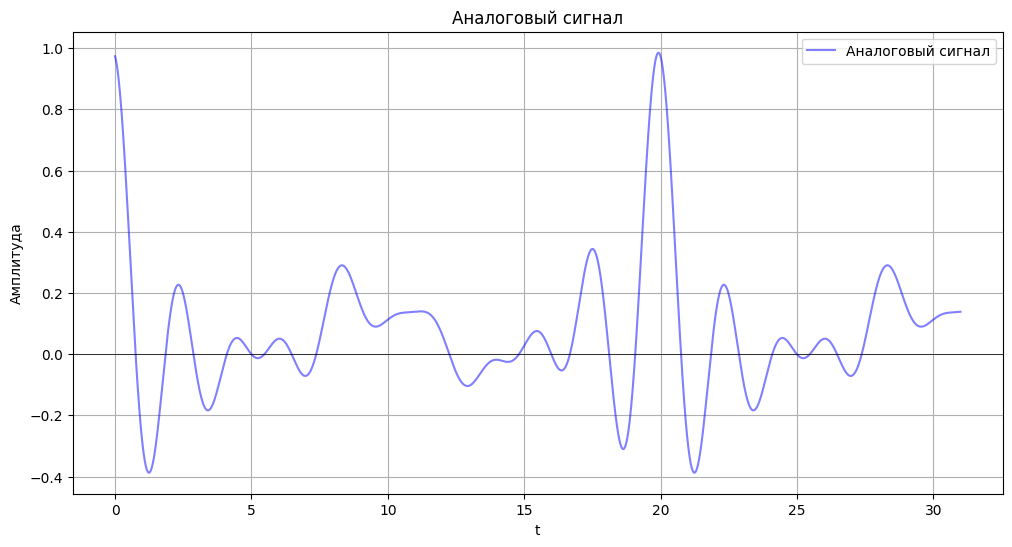

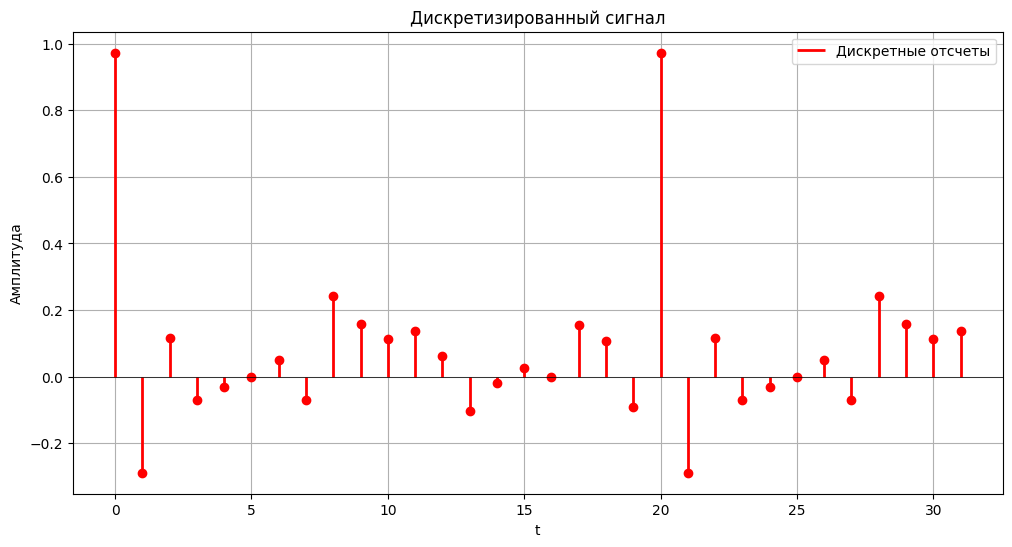

In [ ]:
import matplotlib.pyplot as plt

# Предположим, что t_analog, analog_signal, t и signal уже определены

# График аналогового сигнала
plt.figure(figsize=(12, 6))
plt.plot(t_analog, analog_signal, 'b-', label='Аналоговый сигнал', alpha=0.5)
plt.grid(True)
plt.xlabel('t')
plt.ylabel('Амплитуда')
plt.title('Аналоговый сигнал')
plt.legend()
plt.axhline(y=0, color='k', linestyle='-', linewidth=0.5)
plt.show()

# График дискретного сигнала
plt.figure(figsize=(12, 6))
plt.vlines(t, [0]*len(t), signal, 'r', linewidth=2, label='Дискретные отсчеты')
plt.plot(t, signal, 'ro')
plt.grid(True)
plt.xlabel('t')
plt.ylabel('Амплитуда')
plt.title('Дискретизированный сигнал')
plt.legend()
plt.axhline(y=0, color='k', linestyle='-', linewidth=0.5)
plt.show()


### Задание 3
С помощью ДПФ найти дискретные отсчеты спектра дискретного сигнала и визуализировать их.


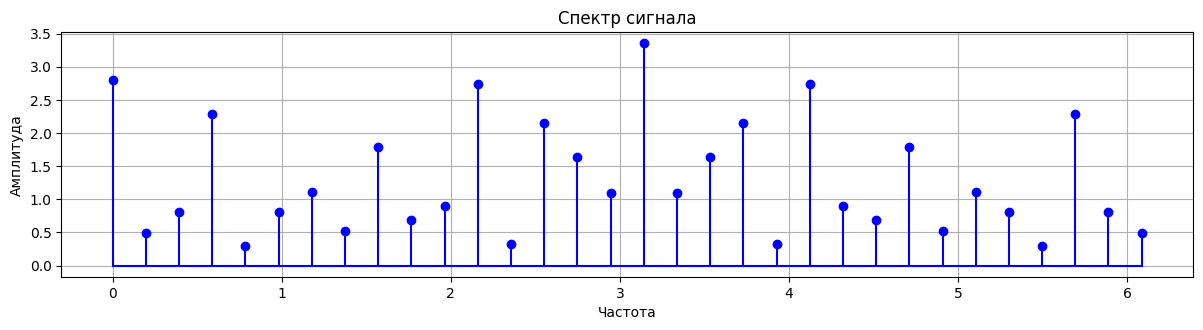

In [ ]:
# Дискретное преобразование Фурье
spectrum = np.fft.fft(signal)

plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 2)
plt.stem([2 * math.pi * i / (N + 1) for i in range(N + 1)], np.abs(spectrum), linefmt='b-', markerfmt='bo', basefmt='b-')
plt.title('Спектр сигнала')
plt.xlabel('Частота')
plt.ylabel('Амплитуда')
plt.grid()

plt.tight_layout()
plt.show()

### Задание 4
Для дискретного сигнала применить линейное сглаживание по 5-ти и 9-ти точкам, представить формулу для $H(\omega)$ – передаточной функции (частотной характеристики) фильтра.

Формула передаточной функции $H( \omega )$ при линейном сглаживании для 5 и 9 точек соотвественно.

$ {H}_{5}(\omega) =  \cfrac{1}{5}  \cfrac{\sin(\frac{5}{2} \omega))}{\sin(\frac{1}{2} \omega)}$

$ H_{9}(\omega) =  \cfrac{1}{9}  \cfrac{\sin(\frac{9}{2} \omega))}{\sin(\frac{1}{2} \omega)}$

In [ ]:
# Сглаживание по 5 точкам
def smooth_5_points(signal):
    N = len(signal)
    smoothed = np.zeros(N)

    smoothed[0:2] = signal[0:2]
    smoothed[-2:] = signal[-2:]

    for n in range(2, N-2):
        smoothed[n] = (1/5) * (signal[n-2] + signal[n-1] + signal[n] +
                            signal[n+1] + signal[n+2])
    return smoothed

# Сглаживание по 9 точкам
def smooth_9_points(signal):
    N = len(signal)
    smoothed = np.zeros(N)

    smoothed[0:4] = signal[0:4]
    smoothed[-4:] = signal[-4:]

    for n in range(4, N-4):
        smoothed[n] = (1/9) * (signal[n-4] + signal[n-3] + signal[n-2] +
                            signal[n-1] + signal[n] + signal[n+1] +
                            signal[n+2] + signal[n+3] + signal[n+4])
    return smoothed

signal_smooth_5 = smooth_5_points(signal)
signal_smooth_9 = smooth_9_points(signal)

### Задание 5
Визуализировать полученный после фильтрации дискретный сигнал совместно с исходным дискретным сигналом.

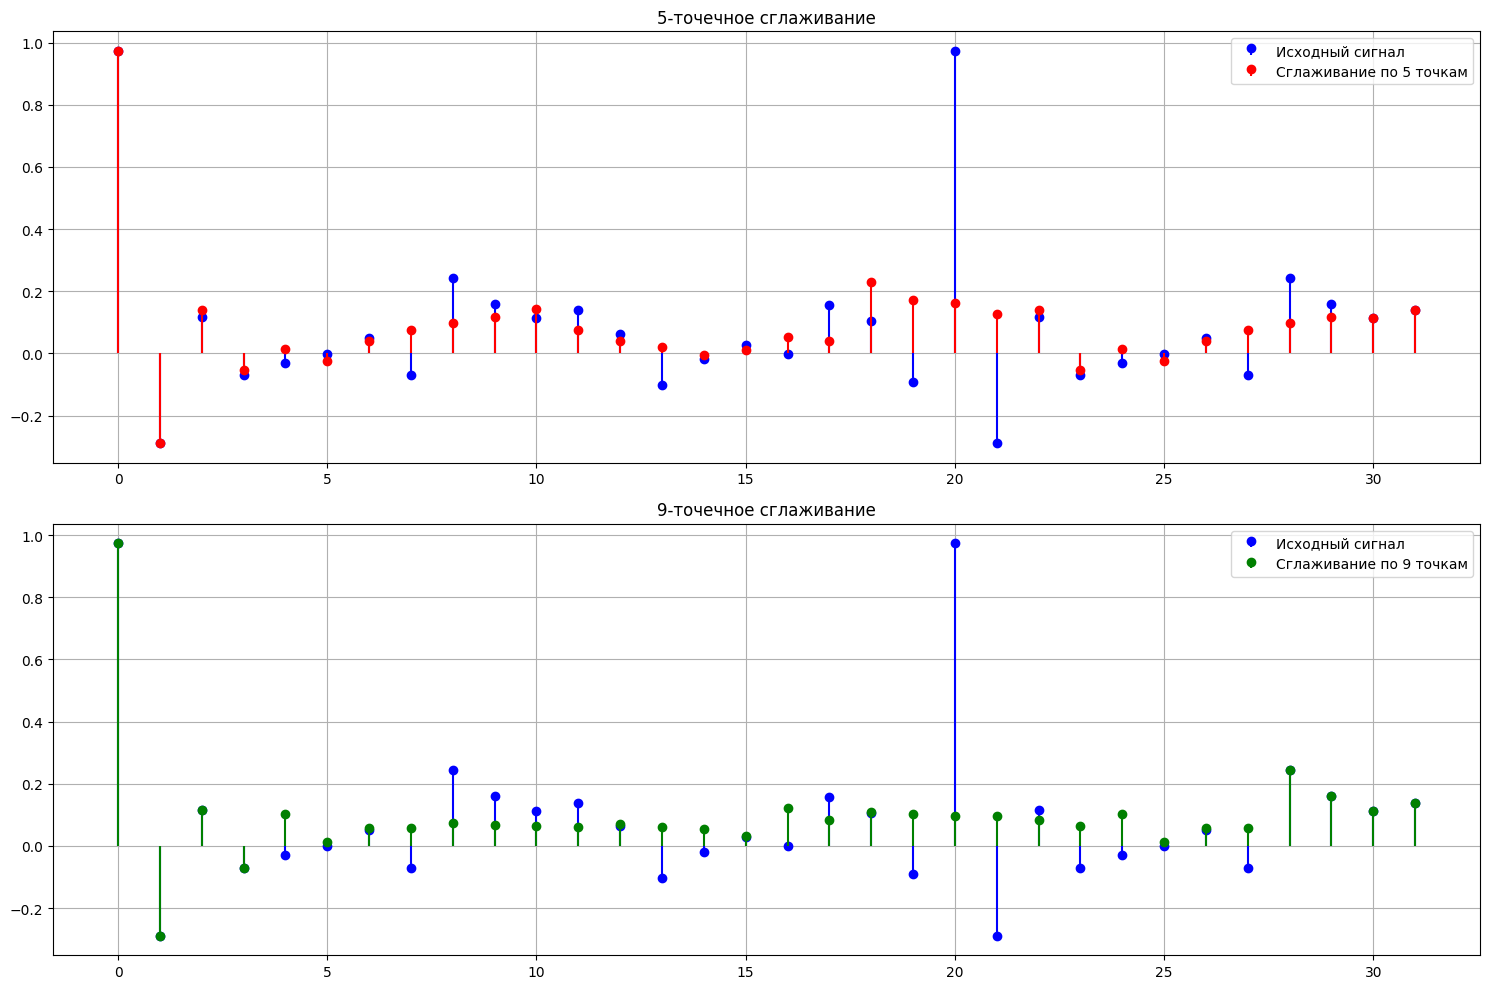

In [ ]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 1, 1)
plt.stem(t, signal, 'b', label='Исходный сигнал', markerfmt='bo', basefmt=" ")
plt.stem(t, signal_smooth_5, 'r', label='Сглаживание по 5 точкам', markerfmt='ro', basefmt=" ")
plt.grid(True)
plt.legend()
plt.title('5-точечное сглаживание')

plt.subplot(2, 1, 2)
plt.stem(t, signal, 'b', label='Исходный сигнал', markerfmt='bo', basefmt=" ")
plt.stem(t, signal_smooth_9, 'g', label='Сглаживание по 9 точкам', markerfmt='go', basefmt=" ")
plt.grid(True)
plt.legend()
plt.title('9-точечное сглаживание')

plt.tight_layout()
plt.show()

### Задание 6
С помощью ДПФ найти дискретные отсчеты спектра дискретного сигнала после его фильтрации и визуализировать их совместно с отчетами спектра исходного дискретного сигнала.

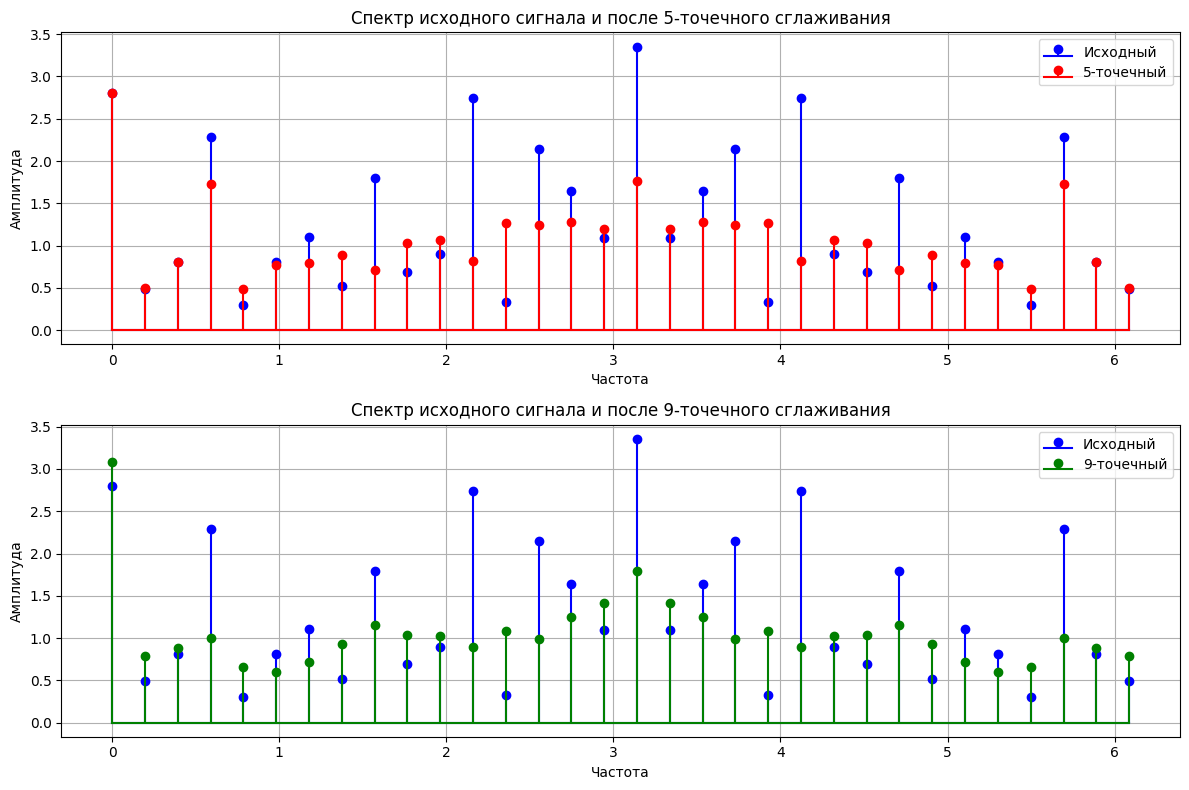

In [ ]:
# Дискретное преобразование Фурье
spectrum_original = np.fft.fft(signal)
spectrum_5 = np.fft.fft(signal_smooth_5)
spectrum_9 = np.fft.fft(signal_smooth_9)

plt.figure(figsize=(12, 8))

# Спектр с 5-точечным сглаживанием
plt.subplot(2, 1, 1)
plt.stem([2 * math.pi * i / (N + 1) for i in range(N + 1)], np.abs(spectrum_original), linefmt='b-', markerfmt='bo', basefmt='b-', label='Исходный')
plt.stem([2 * math.pi * i / (N + 1) for i in range(N + 1)], np.abs(spectrum_5), linefmt='r-', markerfmt='ro', basefmt='r-', label='5-точечный')
plt.title('Спектр исходного сигнала и после 5-точечного сглаживания')
plt.xlabel('Частота')
plt.ylabel('Амплитуда')
plt.grid()
plt.legend()

# Спектр с 9-точечным сглаживанием
plt.subplot(2, 1, 2)
plt.stem([2 * math.pi * i / (N + 1) for i in range(N + 1)], np.abs(spectrum_original), linefmt='b-', markerfmt='bo', basefmt='b-', label='Исходный')
plt.stem([2 * math.pi * i / (N + 1) for i in range(N + 1)], np.abs(spectrum_9), linefmt='g-', markerfmt='go', basefmt='g-', label='9-точечный')
plt.title('Спектр исходного сигнала и после 9-точечного сглаживания')
plt.xlabel('Частота')
plt.ylabel('Амплитуда')
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()

### Задание 7
Проанализировать результат на соответствие значениям $H(\omega)$. Сделать выводы.


Для проведения анализа построим график передаточной функции ${H}(\omega)$ для линейного сглаживания дискретного сигнала

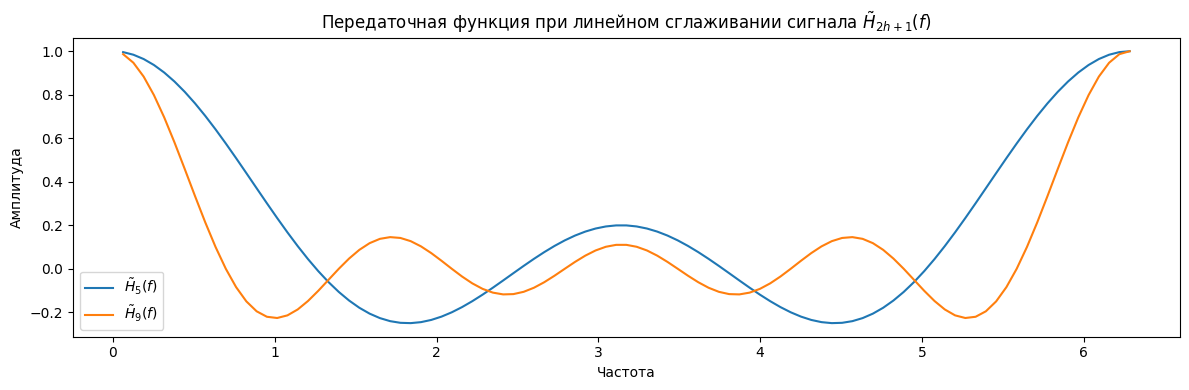

In [ ]:
def H_1(w, h):
  return 1 / (2 * h + 1) * np.sin(w * (h + 1/2)) / np.sin(w / 2)

w = np.linspace(0, 2 * math.pi, 100) #диапазон частот

plt.figure(figsize=(12, 4))

for i in [2, 4]:
  plt.plot(w, H_1(w, i), label = "$ \\tilde{H}_{" + str(2 * i + 1) + "}(f) $")

plt.title('Передаточная функция при линейном сглаживании сигнала $ \\tilde{H}_{2h+1}(f) $')
plt.ylabel('Амплитуда')
plt.xlabel('Частота')

plt.tight_layout()
plt.legend()
plt.show()

Как можно увидеть, график передаточной функции описывает процесс фильтрации с последующим разложением в спектр дисктретного сигнала. Нулевые частоты и близкие к ним не подавляются или подавляются незначительно. Однако при высокочастотном сигнале происходит некоторое аномальное колебание, которое соответствует явлению Гиббса.   

### Задание 8
Повторить п. 4–7 для следующих фильтров:
- Дискретный фильтр, соответствующий численному дифференцированию 1-го порядка.
- Дискретный фильтр, соответствующий численному интегрированию (прямоугольников, трапеций, Симпсона).

Для дискретного сигнала применить дискретный фильтр, соответствующий численному дифференцированию 1-го порядка. Представить формулу для $H(\omega)$ – передаточной функции (частотной характеристики) фильтра.

$H(\omega) = \cfrac{e^{i\omega} - e^{-i\omega}}{2} = i\sin(\omega)$

In [ ]:
def numerical_diff_filter(signal):
    kernel = np.array([-1/2, 0, 1/2])

    return np.convolve(signal, kernel, mode='same')

Визуализировать полученный после фильтрации дискретный сигнал совместно с исходным дискретным сигналом.

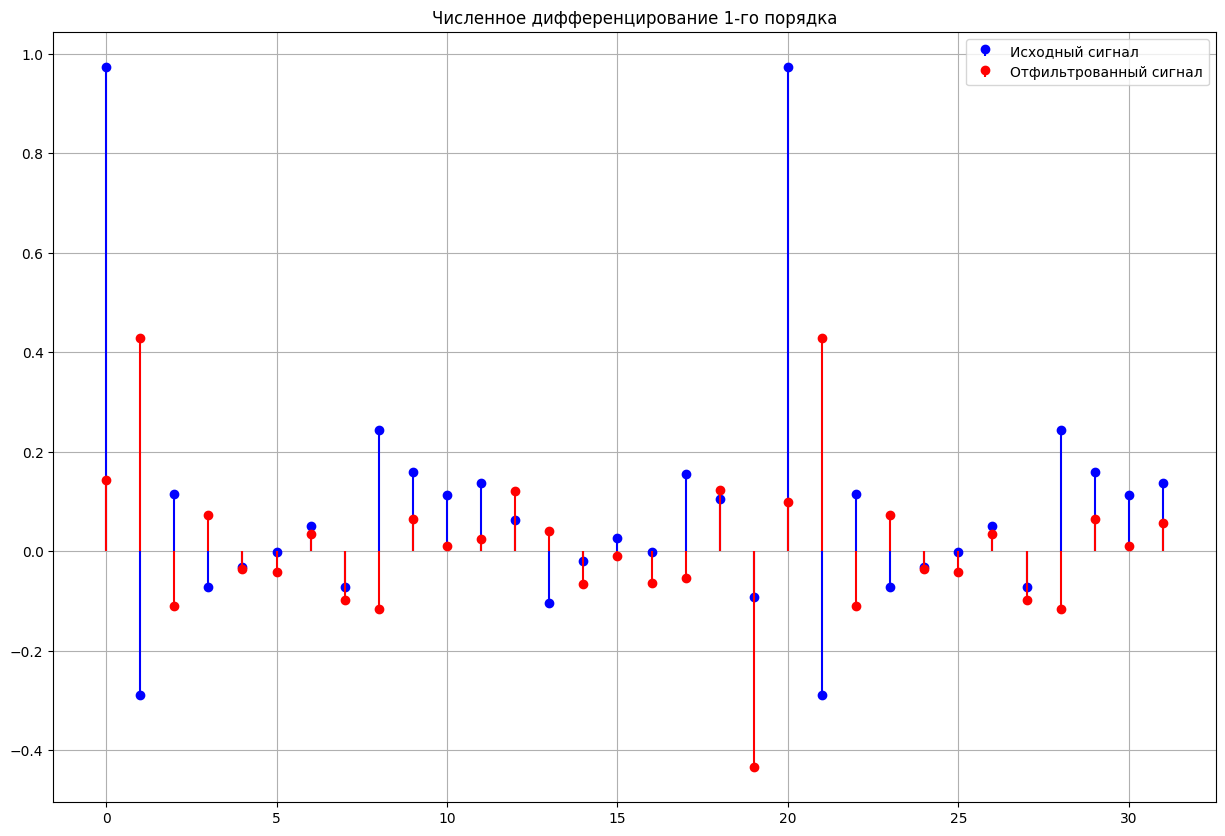

In [ ]:
signal_diff = numerical_diff_filter(signal)

plt.figure(figsize=(15, 10))

plt.stem(t, signal, 'b', label='Исходный сигнал', markerfmt='bo', basefmt=" ")
plt.stem(t, signal_diff, 'r', label='Отфильтрованный сигнал', markerfmt='ro', basefmt=" ")
plt.grid(True)
plt.title('Численное дифференцирование 1-го порядка')
plt.legend()

plt.show()

С помощью ДПФ найти дискретные отсчеты спектра дискретного сигнала после его фильтрации и визуализировать их совместно с отчетами спектра исходного дискретного сигнала.

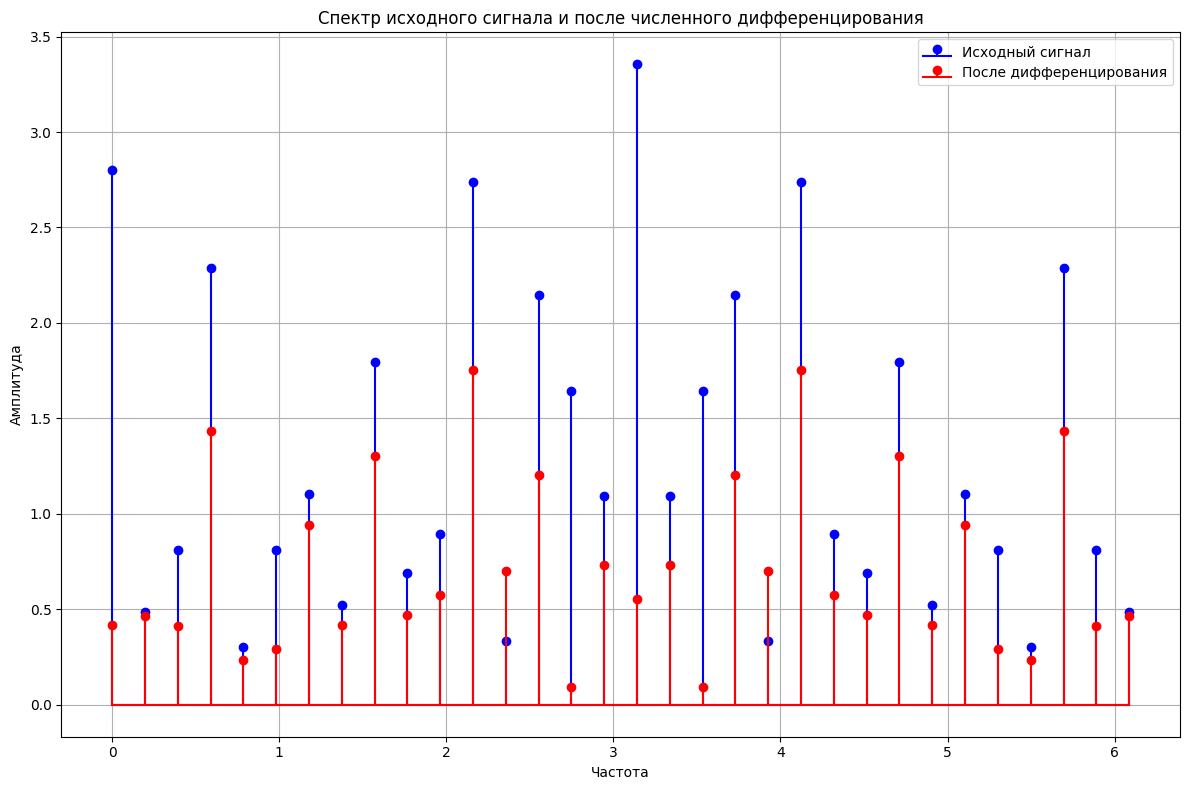

In [ ]:
spectrum_original = np.fft.fft(signal)
spectrum_diff = np.fft.fft(signal_diff)

plt.figure(figsize=(12, 8))

frequencies = [2 * np.pi * i / (N + 1) for i in range(N + 1)]

plt.stem(frequencies, np.abs(spectrum_original), linefmt='b-', markerfmt='bo',
        basefmt='b-', label='Исходный сигнал')
plt.stem(frequencies, np.abs(spectrum_diff), linefmt='r-', markerfmt='ro',
        basefmt='r-', label='После дифференцирования')

plt.title('Спектр исходного сигнала и после численного дифференцирования')
plt.xlabel('Частота')
plt.ylabel('Амплитуда')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


Проанализировать результат на соответствие значениям $H(\omega)$. Сделать выводы.


Для проведения анализа построим график передаточной функции ${H}(\omega)$ для дискретного фильтра, соответствующего численному дифференцированию 1-го порядка.

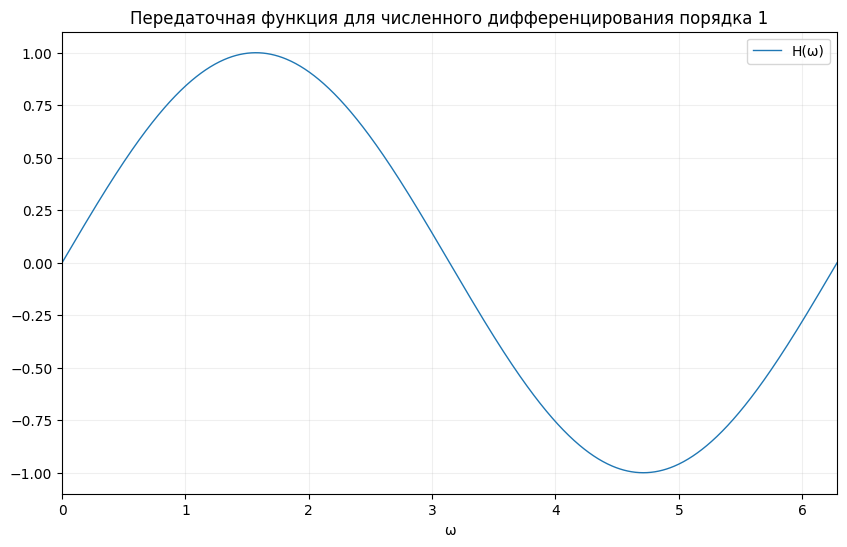

In [ ]:
x = np.linspace(0, 2 * math.pi, 1000)
y = (1j * np.sin(x)).imag

plt.figure(figsize=(10, 6))
plt.plot(x, y, linewidth=1, label='H(ω)')

plt.grid(True, linestyle='-', alpha=0.2)
plt.xlabel('ω')
plt.ylabel('')

plt.legend()

plt.ylim(-1.1, 1.1)
plt.xlim(0, 2 * math.pi)
plt.title('Передаточная функция для численного дифференцирования порядка 1')
plt.show()


Анализируя передаточную функцию численного дифференцирования 1-го порядка, можно заметить, что она имеет синусоидальную форму. Такая форма передаточной функции приводит к тому, что амплитуды спектральных составляющих сигнала изменяются неравномерно: составляющие средних частот не искажаются, в то время как низкие и высокие частоты подавляются.

Полученные результаты соотносятся с графиком передаточной функции.

Для дискретного сигнала применить дискретный фильтр, соответствующий численному интегрированию (прямоугольников, трапеций, Симпсона). Представить формулу для $H(\omega)$ – передаточной функции (частотной характеристики) фильтра.

Передаточная функция для формулы прямоугольника

$H(\omega) = \cfrac{1}{2i\sin(\omega/2)}$

Передаточная функция для формулы трапеции

$H(\omega) = \cfrac{\cos(\frac{\omega}{2})}{2i\sin(\frac{\omega}{2})}$

Передаточная функция для формулы Симпсона

$H(\omega) = \cfrac{2 + \cos(\omega)}{3i\sin(\omega)}$

In [ ]:
def integrate_rectangle(signal):
    N = len(signal)
    integrated = np.zeros(N)

    # Начальное значение интеграла
    integrated[0] = 0

    for n in range(N-1):
        integrated[n+1] = integrated[n] + analog_signal[n * 100 + 50]

    return integrated

def integrate_trapezoid(signal):
    N = len(signal)
    integrated = np.zeros(N)

    # Начальное значение интеграла
    integrated[0] = 0

    for n in range(N-1):
        integrated[n+1] = integrated[n] + 0.5 * (signal[n] + signal[n+1])

    return integrated

def integrate_simpson(signal):
    N = len(signal)
    integrated = np.zeros(N)

    # Начальное значение интеграла
    integrated[0] = 0

    for n in range(1, N-1):
        integrated[n + 1] = integrated[n-1] + (1/3) * (signal[n-1] + 4 * signal[n] + signal[n+1])

    return integrated

Визуализировать полученный после фильтрации дискретный сигнал совместно с исходным дискретным сигналом.

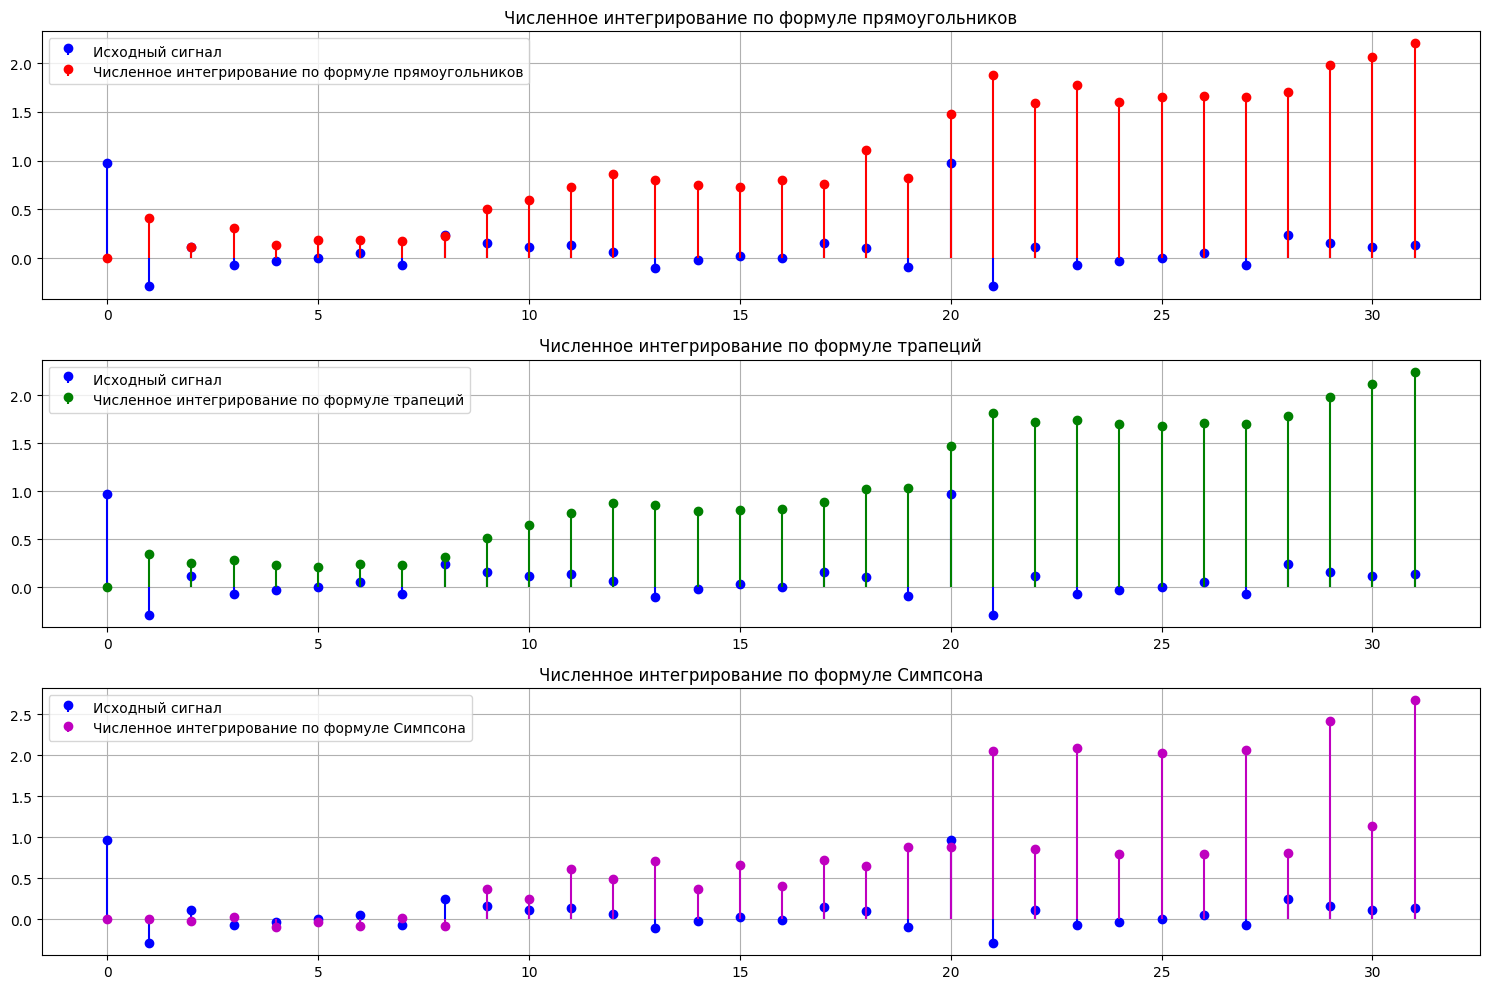

In [ ]:
# Применяем сглаживание
signal_integrate_rectangle = integrate_rectangle(signal)
signal_integrate_trapezoid = integrate_trapezoid(signal)
signal_integrate_simpson = integrate_simpson(signal)

# Временная область
plt.figure(figsize=(15, 10))

plt.subplot(3, 1, 1)
plt.stem(t, signal, 'b', label='Исходный сигнал', markerfmt='bo', basefmt=" ")
plt.stem(t, signal_integrate_rectangle, 'r', label='Численное интегрирование по формуле прямоугольников', markerfmt='ro', basefmt=" ")
plt.grid(True)
plt.legend()
plt.title('Численное интегрирование по формуле прямоугольников')

plt.subplot(3, 1, 2)
plt.stem(t, signal, 'b', label='Исходный сигнал', markerfmt='bo', basefmt=" ")
plt.stem(t, signal_integrate_trapezoid, 'g', label='Численное интегрирование по формуле трапеций', markerfmt='go', basefmt=" ")
plt.grid(True)
plt.legend()
plt.title('Численное интегрирование по формуле трапеций')

plt.subplot(3, 1, 3)
plt.stem(t, signal, 'b', label='Исходный сигнал', markerfmt='bo', basefmt=" ")
plt.stem(t, signal_integrate_simpson, 'm', label='Численное интегрирование по формуле Симпсона', markerfmt='mo', basefmt=" ")
plt.grid(True)
plt.legend()
plt.title('Численное интегрирование по формуле Симпсона')

plt.tight_layout()
plt.show()

С помощью ДПФ найти дискретные отсчеты спектра дискретного сигнала после его фильтрации и визуализировать их совместно с отчетами спектра исходного дискретного сигнала.

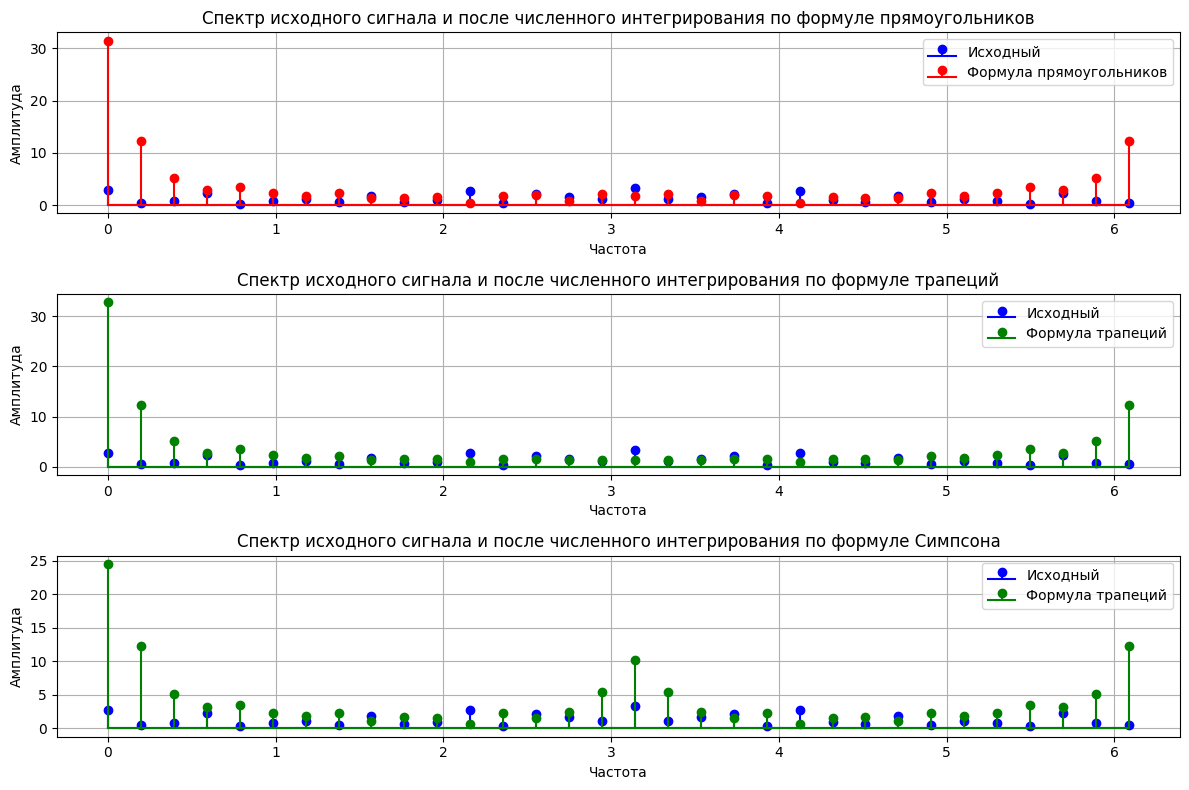

In [ ]:
spectrum_integrate_rectangle = np.fft.fft(signal_integrate_rectangle)
spectrum_integrate_trapezoid = np.fft.fft(signal_integrate_trapezoid)
spectrum_integrate_simpson = np.fft.fft(signal_integrate_simpson)

plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.stem([2 * math.pi * i / (N + 1) for i in range(N + 1)], np.abs(spectrum_original), linefmt='b-', markerfmt='bo', basefmt='b-', label='Исходный')
plt.stem([2 * math.pi * i / (N + 1) for i in range(N + 1)], np.abs(spectrum_integrate_rectangle), linefmt='r-', markerfmt='ro', basefmt='r-', label='Формула прямоугольников')
plt.title('Спектр исходного сигнала и после численного интегрирования по формуле прямоугольников')
plt.xlabel('Частота')
plt.ylabel('Амплитуда')
plt.grid()
plt.legend()

plt.subplot(3, 1, 2)
plt.stem([2 * math.pi * i / (N + 1) for i in range(N + 1)], np.abs(spectrum_original), linefmt='b-', markerfmt='bo', basefmt='b-', label='Исходный')
plt.stem([2 * math.pi * i / (N + 1) for i in range(N + 1)], np.abs(spectrum_integrate_trapezoid), linefmt='g-', markerfmt='go', basefmt='g-', label='Формула трапеций')
plt.title('Спектр исходного сигнала и после численного интегрирования по формуле трапеций')
plt.xlabel('Частота')
plt.ylabel('Амплитуда')
plt.grid()
plt.legend()

plt.subplot(3, 1, 3)
plt.stem([2 * math.pi * i / (N + 1) for i in range(N + 1)], np.abs(spectrum_original), linefmt='b-', markerfmt='bo', basefmt='b-', label='Исходный')
plt.stem([2 * math.pi * i / (N + 1) for i in range(N + 1)], np.abs(spectrum_integrate_simpson), linefmt='g-', markerfmt='go', basefmt='g-', label='Формула трапеций')
plt.title('Спектр исходного сигнала и после численного интегрирования по формуле Симпсона')
plt.xlabel('Частота')
plt.ylabel('Амплитуда')
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()

Проанализировать результат на соответствие значениям $H(\omega)$. Сделать выводы.


Для проведения анализа построим график передаточной функции ${H}(\omega)$ для сглаживания 2-ой степени дискретного сигнала

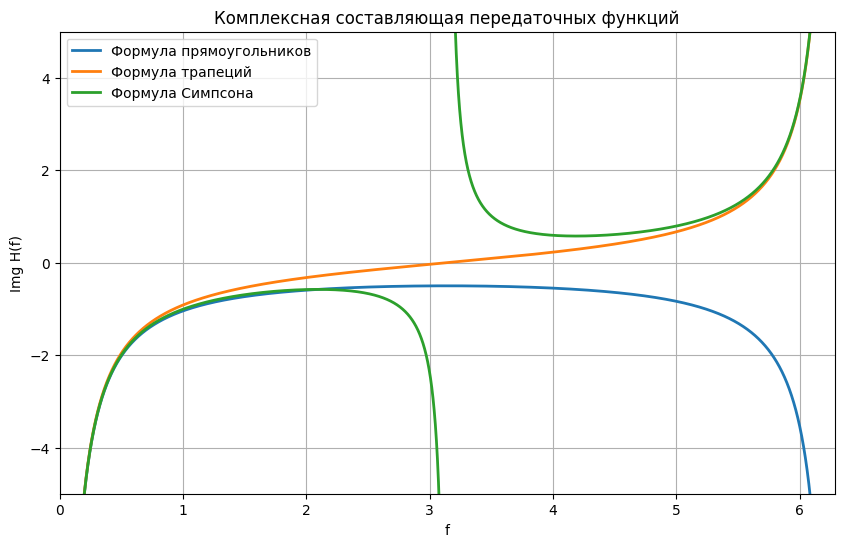

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math

omega = np.linspace(0, 2 * math.pi, 10000)

# Вычисление передаточных функций
H_rect = 1 / (2j * np.sin(omega / 2))  # Прямоугольник
H_trap = np.cos(omega / 2) / (2j * np.sin(omega / 2))  # Трапеции
H_simp = (2 + np.cos(omega)) / (3j * np.sin(omega))  # Симпсона

# Извлечение мнимой части
amp_rect = np.imag(H_rect)
amp_trap = np.imag(H_trap)
amp_simp = np.imag(H_simp)

# Замена значений вблизи разрыва на NaN
amp_simp[np.abs(omega - math.pi) < 1e-3] = np.nan

plt.figure(figsize=(10, 6))
plt.plot(omega, amp_rect, label='Формула прямоугольников', linewidth=2)
plt.plot(omega, amp_trap, label='Формула трапеций', linewidth=2)
plt.plot(omega, amp_simp, label='Формула Симпсона', linewidth=2)

plt.grid(True)
plt.legend()
plt.xlabel('f')
plt.ylabel('Img H(f)')
plt.title('Комплексная составляющая передаточных функций')

# Устанавливаем пределы осей как на изображении
plt.xlim(0, 2 * math.pi)
plt.ylim(-5, 5)

plt.show()


Из графика передаточных функций наблюдать, что
при применении фильтра, соответствующему численному интегрированию по
формуле трапеций и формуле прямоугольников низкие частоты значительно
усиливаются, а средние и высокие частоты подавляются. В отличие от этих
формул, формула Симпсона усиливает как низкие, так и высокие частоты, при
этом подавляя средние. Представленные передаточных
функций обосновывают изменения амплитудного спектра сигнала.


Полученные результаты соотносятся с графиком передаточной функции.


## Выводы

В ходе данной лабораторной работы было изучено дискретное преобразование Фурье (ДПФ), которое позволяет проводить спектральный анализ сигналов путем их разложения на гармонические составляющие. В ходе работы был сгенерирован аналоговый сигнал, который затем подвергся дискретизации. Для полученного дискретного сигнала был построен спектр, отражающий его частотный состав.

В работе исследовались рекурсивные фильтры на основе численного дифференцирования первого порядка и различных методов численного интегрирования (прямоугольников, трапеций и Симпсона). Анализ передаточных функций и спектров сигналов показал следующие особенности фильтров:

- Фильтр численного дифференцирования первого порядка пропускает средние частоты и подавляет низкие и высокие частотные составляющие
- Фильтры численного интегрирования по методам прямоугольников и трапеций усиливают низкочастотные составляющие сигнала при одновременном подавлении средних и высоких частот
- Фильтр на основе формулы Симпсона демонстрирует усиление как низких, так и высоких частот при подавлении средних частотных составляющих

Передаточные функции фильтров наглядно демонстрируют, как изменяются амплитуды различных частотных составляющих в спектре обработанного сигнала по сравнению с исходным.
